# Reading Data in Database Files

In [62]:
# Imports
import sqlite3 as sq3
import pandas.io.sql as pds
import pandas as pd

In [63]:
# Download the database
!wget -P ./ https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/classic_rock.db

--2024-01-18 14:21:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/classic_rock.db
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5652480 (5.4M) [binary/octet-stream]
Saving to: ‘./classic_rock.db.2’

classic_rock.db.2   100%[===================>]   5.39M  3.35MB/s    in 1.6s    

2024-01-18 14:21:40 (3.35 MB/s) - ‘./classic_rock.db.2’ saved [5652480/5652480]



In [64]:
# Initialize path to SQLite databasejdbc:sqlite:/C:/__tmp/test/sqlite/jdbcTest.db
path = 'data/classic_rock.db'
con = sq3.Connection(path)

# We now have a live connection to our SQL database

In [65]:
# Now that we've got a connection to our database, we can perform queries, and load their results in as Pandas DataFrames

# Write the query
query = '''
SELECT * 
FROM rock_songs;
'''

# Execute the query
observations = pds.read_sql(query, con)

observations.head()

,Song,Artist,Release_Year,PlayCount
0,Caught Up in You,.38 Special,1982.0,82
1,Hold On Loosely,.38 Special,1981.0,85
2,Rockin' Into the Night,.38 Special,1980.0,18
3,Art For Arts Sake,10cc,1975.0,1
4,Kryptonite,3 Doors Down,2000.0,13


In [66]:
# We can also run any supported SQL query
# Write the query
query = '''
SELECT Artist, Release_Year, COUNT(*) AS num_songs, AVG(PlayCount) AS avg_plays  
    FROM rock_songs
    GROUP BY Artist, Release_Year
    ORDER BY num_songs desc;
'''

# Execute the query
observations = pds.read_sql(query, con)

observations.head()

,Artist,Release_Year,num_songs,avg_plays
0,The Beatles,1967.0,23,6.565217
1,Led Zeppelin,1969.0,18,21.000000
2,The Beatles,1965.0,15,3.800000
3,The Beatles,1968.0,13,13.000000
4,The Beatles,1969.0,13,15.000000


Some common paramters that can be used to read in SQL data with formatting:

 - coerce_float: Attempt to force numbers into floats
 - parse_dates: List of columns to parse as dates
 - chunksize: Number of rows to include in each chunk

In [67]:
query='''
SELECT Artist, Release_Year, COUNT(*) AS num_songs, AVG(PlayCount) AS avg_plays  
    FROM rock_songs
    GROUP BY Artist, Release_Year
    ORDER BY num_songs desc;
'''

# Execute the query
observations_generator = pds.read_sql(query,
                            con,
                            coerce_float=True, # Doesn't efefct this dataset, because floats were correctly parsed
                            parse_dates=['Release_Year'], # Parse `Release_Year` as a date
                            chunksize=5 # Allows for streaming results as a series of shorter tables
                           )

for index, observations in enumerate(observations_generator):
    if index < 5:
        print(f'Observations index: {index}'.format(index))
        display(observations)

Observations index: 0


,Artist,Release_Year,num_songs,avg_plays
0,The Beatles,1970-01-01 00:32:47,23,6.565217
1,Led Zeppelin,1970-01-01 00:32:49,18,21.000000
2,The Beatles,1970-01-01 00:32:45,15,3.800000
3,The Beatles,1970-01-01 00:32:48,13,13.000000
4,The Beatles,1970-01-01 00:32:49,13,15.000000


Observations index: 1


,Artist,Release_Year,num_songs,avg_plays
0,Led Zeppelin,1970-01-01 00:32:50,12,13.166667
1,Led Zeppelin,1970-01-01 00:32:55,12,14.166667
2,Pink Floyd,1970-01-01 00:32:59,11,41.454545
3,Pink Floyd,1970-01-01 00:32:53,10,29.100000
4,The Doors,1970-01-01 00:32:47,10,28.900000


Observations index: 2


,Artist,Release_Year,num_songs,avg_plays
0,Fleetwood Mac,1970-01-01 00:32:57,9,35.666667
1,Jimi Hendrix,1970-01-01 00:32:47,9,24.888889
2,The Beatles,1970-01-01 00:32:43,9,2.444444
3,The Beatles,1970-01-01 00:32:44,9,3.111111
4,Elton John,1970-01-01 00:32:53,8,18.500000


Observations index: 3


,Artist,Release_Year,num_songs,avg_plays
0,Led Zeppelin,1970-01-01 00:32:51,8,47.750000
1,Led Zeppelin,1970-01-01 00:32:53,8,34.125000
2,Boston,1970-01-01 00:32:56,7,69.285714
3,Rolling Stones,1970-01-01 00:32:49,7,36.142857
4,Van Halen,1970-01-01 00:32:58,7,51.142857


Observations index: 4


,Artist,Release_Year,num_songs,avg_plays
0,Bruce Springsteen,1970-01-01 00:32:55,6,7.666667
1,Bruce Springsteen,1970-01-01 00:33:04,6,11.500000
2,Creedence Clearwater Revival,1970-01-01 00:32:49,6,23.833333
3,Creedence Clearwater Revival,1970-01-01 00:32:50,6,18.833333
4,Def Leppard,1970-01-01 00:33:07,6,32.000000


In [68]:
# Download the database
!wget -P ./ https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/baseball.db

--2024-01-18 14:21:42--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/baseball.db
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7626752 (7.3M) [binary/octet-stream]
Saving to: ‘./baseball.db.2’

baseball.db.2       100%[===================>]   7.27M  3.34MB/s    in 2.2s    

2024-01-18 14:21:44 (3.34 MB/s) - ‘./baseball.db.2’ saved [7626752/7626752]



In [69]:
path = 'baseball.db'

# Create a connection, `con`, that is connected to database at `path`
con = sq3.Connection(path)

# Create a variable, `query`, containing a SQL query which reads in all data from the `` table

query = """
SELECT *
    FROM allstarfull
    ;
"""

allstar_observations = pd.read_sql(query, con)

# print(allstar_observations)

# Create a variable, tables, which reads in all data from the table sqlite_master
all_tables = pd.read_sql('SELECT * FROM sqlite_master', con)
print(all_tables)

# Pretend that you were interesting in creating a new baseball hall of fame. Join and analyze the tables to evaluate the top 3 all time best baseball players
best_query = """
SELECT playerID, sum(GP) AS num_games_played, AVG(startingPos) AS avg_starting_position
    FROM allstarfull
    GROUP BY playerID
    ORDER BY num_games_played DESC, avg_starting_position ASC
    LIMIT 3
"""
best = pd.read_sql(best_query, con)
print(best.head())

    type                  name     tbl_name  rootpage  \
0  table           allstarfull  allstarfull         2   
1  index  ix_allstarfull_index  allstarfull         3   
2  table               schools      schools        26   
3  index      ix_schools_index      schools        31   
4  table               batting      batting        99   
5  index      ix_batting_index      batting       100   

                                                 sql  
0  CREATE TABLE "allstarfull" (\n"index" INTEGER,...  
1  CREATE INDEX "ix_allstarfull_index"ON "allstar...  
2  CREATE TABLE "schools" (\n"index" INTEGER,\n  ...  
3  CREATE INDEX "ix_schools_index"ON "schools" ("...  
4  CREATE TABLE "batting" (\n"index" INTEGER,\n  ...  
5  CREATE INDEX "ix_batting_index"ON "batting" ("...  
    playerID  num_games_played  avg_starting_position
0  musiast01              24.0               6.357143
1   mayswi01              24.0               8.000000
2  aaronha01              24.0               8.470588

# Data Cleaning


In [70]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [71]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data1.tsv'
housing = pd.read_csv(path, sep='\t')

housing.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
6,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
7,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
8,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
9,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500


In [72]:
# We can find more information about the features and types using the `info()`  method.

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

According to the output above, we have 2930 entries, 0 to 2929, as well as 81 features. The "Non-Null Count" column shows the number of non-null entries.  If the count is 2930 then there is no missing values for that particular feature. 'SalePrice' is our target or response variable and the rest of the features are our predictor variables.

We also have a mix of numerical (28 int64 and 11 float64) and object data types. 


In [73]:
housing["SalePrice"].describe()

count      2931.000000
mean     180807.729785
std       79875.557267
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

From the above analysis, it is important to note that the minimum value is greater than 0. Also, there is a big difference between the minimum value and the 25th percentile. It is bigger than the 75th percentile and the maximum value. This means that our data might not be normally distributed (an important assumption for linear regression analysis), so will check for normality in the Log Transform section. 

The `describe()` function reveals the statistical information about the numeric attributes. To reveal some information about our categorical (object) attributes, we can use `value_counts()` function. In this exercise, describe all categories of the 'Sale Condition' attribute.



In [74]:
housing["Sale Condition"].value_counts()

Normal     2414
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: Sale Condition, dtype: int64

## **Looking for Correlations**

Before starting the process of data cleaning, it is important to determine the correlation between the response variable (in our case, the sale price) and other predictor variables. Some variables may not have a significant impact on the price of the house and will not be included in the analysis. There are several methods to identify the correlation between the target variable and other features, such as pair plots, scatter plots, heat maps, and correlation matrices. In this case, we will use the `corr()` function to list the top features based on the Pearson correlation coefficient, which measures how closely two sequences of numbers are correlated. However, it's important to note that correlation coefficient can only be calculated on numerical attributes like floats and integers. Therefore, only numeric attributes will be selected for the analysis.

In [75]:
hous_num = housing.select_dtypes(include = ['float64', 'int64'])
hous_num_corr = hous_num.corr()['SalePrice'][:-1] # -1 means that the latest row is SalePrice

# print(hous_num_corr )
top_features = hous_num_corr[abs(hous_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print(f"There is {len(top_features)} strongly correlated values with SalePrice:\n{top_features}")

There is 11 strongly correlated values with SalePrice:
Overall Qual      0.799226
Gr Liv Area       0.706791
Garage Cars       0.647891
Garage Area       0.640411
Total Bsmt SF     0.632270
1st Flr SF        0.621672
Year Built        0.558340
Full Bath         0.545339
Year Remod/Add    0.532664
Garage Yr Blt     0.526808
Mas Vnr Area      0.508277
Name: SalePrice, dtype: float64


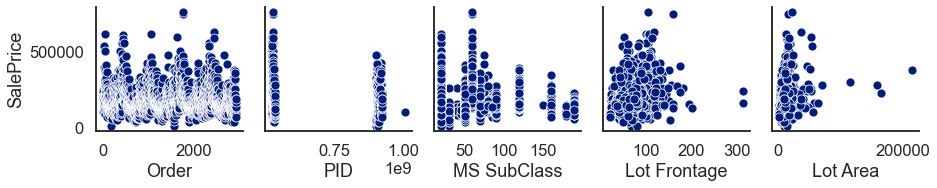

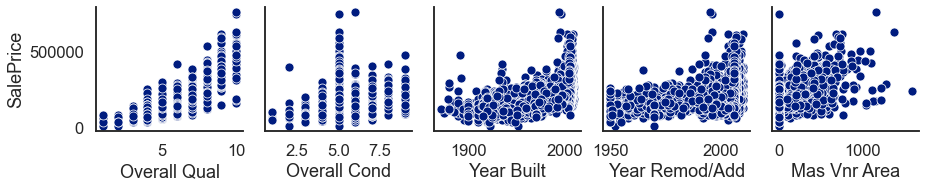

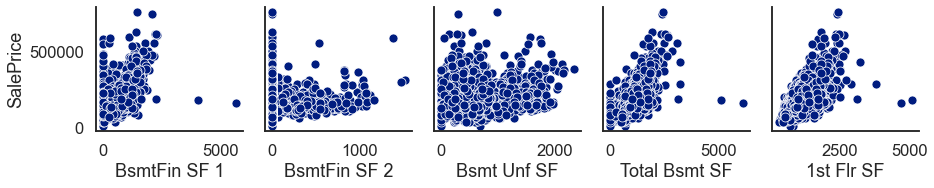

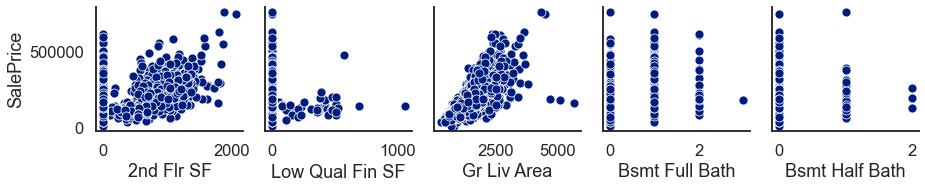

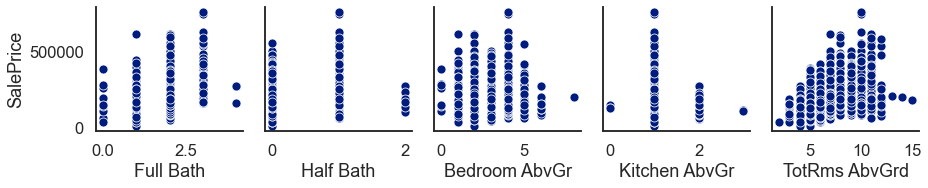

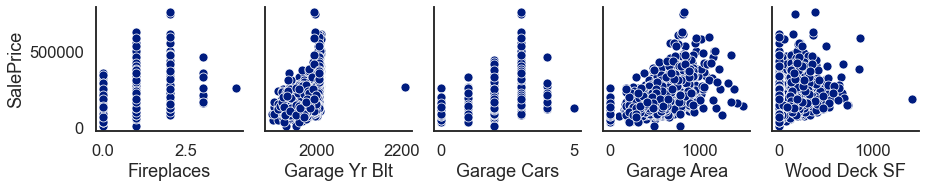

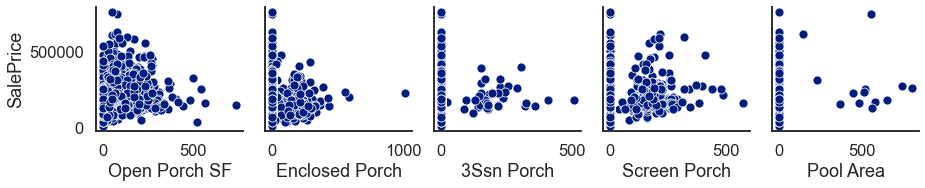

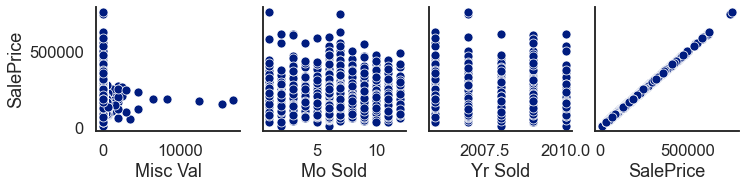

In [76]:
for i in range(0, hous_num.columns.size, 5):
    sns.pairplot(data=hous_num,
                x_vars=hous_num.columns[i:i+5],
                y_vars=['SalePrice'])

## **Log Transformation**
In this section, we are going to inspect whether our 'SalePrice' data are normally distributed. The assumption of the normal distribution must be met in order to perform any type of regression analysis. There are several ways to check for this assumption, however here, we will use the visual method, by plotting the 'SalePrice' distribution using the `distplot()` function from the `seaborn` library.


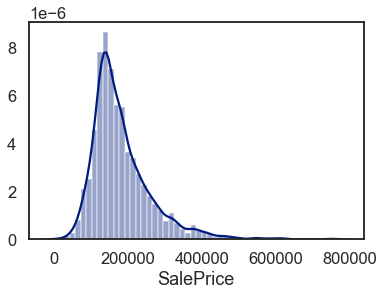

In [77]:
sp_untransformed = sns.distplot(housing['SalePrice'])

In [78]:
# The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0. In our case, we have ~1.7, so it is considered  highly skewed data. 

print(f"Skewness: {housing['SalePrice'].skew()}")

Skewness: 1.743221853159165


Skewness: -0.015353828434352058


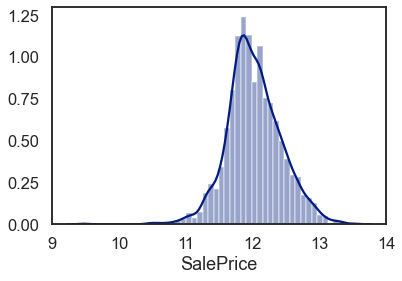

In [79]:
# transform our data, so it looks more normally distributed.
log_transformed = np.log(housing['SalePrice'])

sp_transformed = sns.distplot(log_transformed)

print(f"Skewness: {log_transformed.skew()}")

Other ways to correct for skewness of the data are: Square Root Transform (`np.sqrt`) and the Box-Cox Transform (`stats.boxcox` from the `scipy stats` library).

## **Handling the Duplicates**


In [80]:
# find duplicate rows
duplicate = housing[housing.duplicated(['PID'])]
duplicate

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000


In [81]:
dup_removed = housing.drop_duplicates()
dup_removed 

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [82]:
# alternative way to check if there are any duplicated Indexes in our dataset is to use the `is_unique` method.
housing.index.is_unique

True

## **Handling the Missing Values**
To facilitate the identification of any missing values, pandas offers three functions: `isna()`, `isnull()`, and `notna()`.

To get an overview of the missing values in our dataset, we will use the `isnull()` function. Then, we will sum up the values using the `sum()` function, sort them with `sort_values()`, and finally plot the first 20 columns, which have the highest number of missing values, using the `bar plot` function from the `matplotlib` library.

Text(0.5, 1.0, 'Total Missing Values')

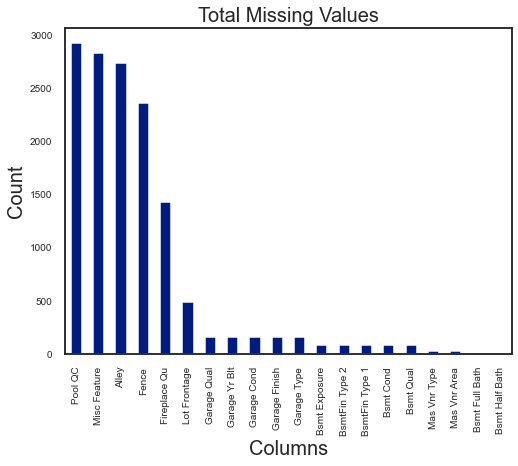

In [83]:
total = housing.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [84]:
# All the rows, containing null values in 'Lot Frontage' feature will be dropped.
housing.dropna(subset=["Lot Frontage"])

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2925,923251180,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,131000
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [85]:
# drop the whole attribute or feature (column), that contains missing values:
housing.drop("Lot Frontage", axis=1)

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926,2926,923275080,80,RL,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [86]:
# replace the missing values (zero, the mean, the median, etc.)
median = housing["Lot Frontage"].median()
housing["Lot Frontage"].fillna(median, inplace = True)
housing.tail()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2926,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2927,2927,923276100,20,RL,68.0,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2928,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2929,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2930,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


## **Feature Scaling**
Feature scaling is a crucial step in data transformation. Two common techniques include min-max scaling and standardization.

In [87]:
norm_data = MinMaxScaler().fit_transform(hous_num)
norm_data

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.63636364e-01, 1.00000000e+00, 2.72444089e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.63636364e-01, 1.00000000e+00, 2.72444089e-01],
       [3.41413452e-04, 1.01788895e-04, 0.00000000e+00, ...,
        4.54545455e-01, 1.00000000e+00, 1.24238256e-01],
       ...,
       [9.99317173e-01, 8.25914814e-01, 3.82352941e-01, ...,
        5.45454545e-01, 0.00000000e+00, 1.60616051e-01],
       [9.99658587e-01, 8.27370610e-01, 0.00000000e+00, ...,
        2.72727273e-01, 0.00000000e+00, 2.11814430e-01],
       [1.00000000e+00, 8.27476641e-01, 2.35294118e-01, ...,
        9.09090909e-01, 0.00000000e+00, 2.36066294e-01]])

In [88]:
scaled_data = StandardScaler().fit_transform(hous_num)
scaled_data

array([[-1.73027969, -0.99682434, -0.87674019, ..., -0.44796566,
         1.67740664,  0.4281423 ],
       [-1.73027969, -0.99682434, -0.87674019, ..., -0.44796566,
         1.67740664,  0.4281423 ],
       [-1.72909781, -0.99656498, -0.87674019, ..., -0.07945953,
         1.67740664, -0.94923488],
       ...,
       [ 1.729097  ,  1.10758639,  0.64804102, ...,  0.2890466 ,
        -1.36026952, -0.61115139],
       [ 1.73027889,  1.11129572, -0.87674019, ..., -0.81647179,
        -1.36026952, -0.13533019],
       [ 1.73146077,  1.11156589,  0.06158671, ...,  1.76307112,
        -1.36026952,  0.09005881]])

## **Handling the Outliers**

In statistics, an outlier refers to an observation that is significantly different from other observations. This can happen due to errors in data collection or recording, or simply because of natural variability in the data. The way we treat an outlier largely depends on the type of analysis we want to perform and the data we are working with. Outliers can have a major impact on our statistical models, and can also provide valuable insights into specific behaviours.

There are many techniques to discover outliers in our data, such as Uni-variate analysis (using one variable analysis) or Multi-variate analysis (using two or more variables). One of the easiest ways to detect an outlier is to visually inspect the data using box plots or scatter plots.

### Uni-variate Analysis
From the two plots shown, it is evident that there are some points outside the box plot area that significantly deviate from the rest of the population. The decision to keep or remove them depends on how well we understand our data and the type of analysis to be performed. In this particular case, the points outside the box plot area for 'Lot Area' and 'Sale Price' may represent actual true data points, and therefore, they should not be removed.

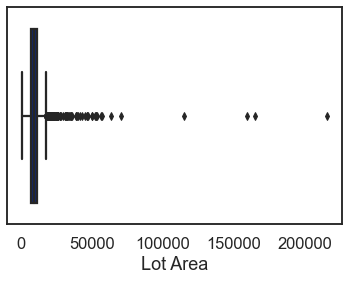

In [89]:
sns.boxplot(x=housing['Lot Area'])

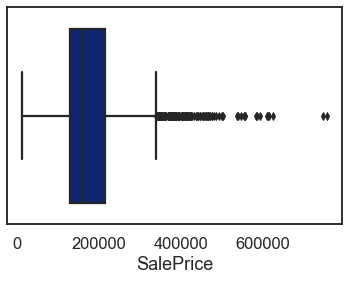

In [90]:
sns.boxplot(x=housing['SalePrice'])

### Bi-variate Analysis


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


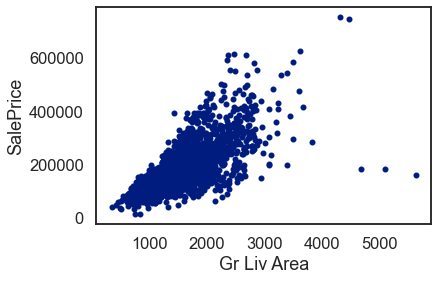

In [91]:
price_area = housing.plot.scatter(x='Gr Liv Area',
                      y='SalePrice')

### Deleting the Outliers


In [92]:
housing.sort_values(by = 'Gr Liv Area', ascending = False)[:2]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1499,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2181,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


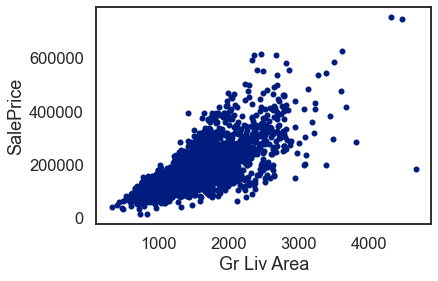

In [93]:
outliers_dropped = housing.drop(housing.index[[1499,2181]])

new_plot = outliers_dropped.plot.scatter(x='Gr Liv Area',
                                         y='SalePrice')

## Z-score Analysis

Z-score can be used to identify outliers in a mathematical way. It is calculated by measuring the number of standard deviations by which an observation or data point is above or below the mean value of the group being observed. In other words, the Z-score is a value that measures the relationship between a specific data point and the mean and standard deviation of the entire group. Data points that are too far from the mean, typically more than 3 or less than -3 standard deviations, are considered outliers. Therefore, if the Z-score value of a data point exceeds this threshold, it will be identified as an outlier.

In [94]:
housing['LQFSF_Stats'] = stats.zscore(housing['Low Qual Fin SF'])
housing[['Low Qual Fin SF','LQFSF_Stats']].describe().round(3)

,Low Qual Fin SF,LQFSF_Stats
count,2931.000,2931.000
mean,4.675,-0.000
std,46.303,1.000
min,0.000,-0.101
25%,0.000,-0.101
50%,0.000,-0.101
75%,0.000,-0.101
max,1064.000,22.882


In [95]:
# The max value of 22.882 is further proof of the presence of outliers, as it falls well above the z-score limit of +3.

## Exploratory Data Analysis (EDA)

In [96]:
import os
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/iris_data.csv'

data = pd.read_csv(path)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [97]:
# Number of rows
print(data.shape)

# Column names
print(data.columns.tolist())

# Data types
print(data.dtypes)

(150, 5)
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [98]:
data['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [99]:
stats_df = data.describe()
stats_df

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [100]:
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
stats_df

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
range,3.600000,2.400000,5.900000,2.400000


In [101]:
out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


In [102]:
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [103]:
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [104]:
# applying multiple functions at once - 2 methods

data.groupby('species').agg(['mean', 'median'])  # passing a list of recognized strings
data.groupby('species').agg([np.mean, np.median])  # passing a list of explicit aggregation functions

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [105]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [106]:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

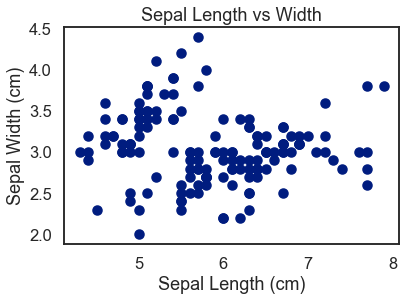

In [107]:
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');

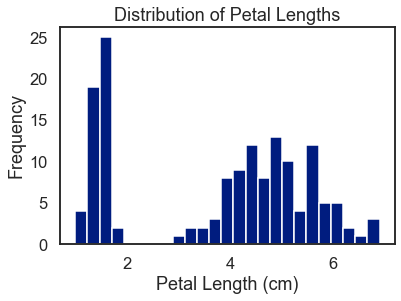

In [108]:
ax = plt.axes()
ax.hist(data.petal_length, bins=25);

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

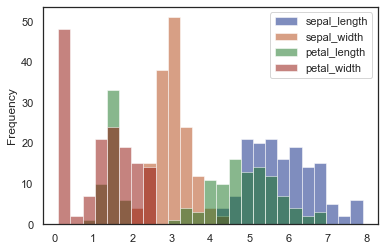

In [109]:
sns.set_context('notebook')
data.plot.hist(bins=25, alpha=0.5)

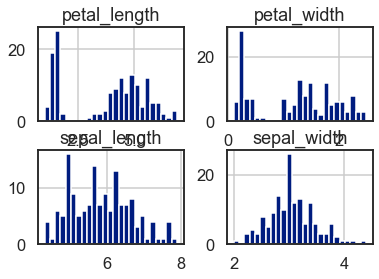

In [110]:
# To create four separate plots, use Pandas `.hist` method
sns.set_context('talk')
axList = data.hist(bins=25)

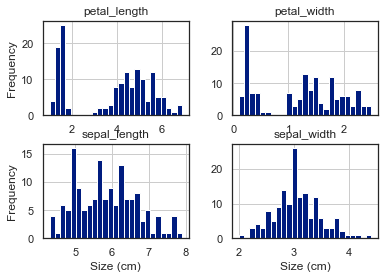

In [111]:
# To create four separate plots, use Pandas `.hist` method
sns.set_context('notebook')

axList = data.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

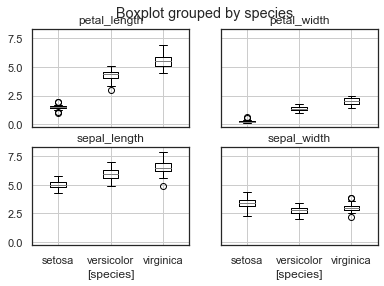

In [112]:
#sns.set_context('poster')

data.boxplot(by='species');


In [113]:
# First we have to reshape the data so there is 
# only a single measurement in each column

plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


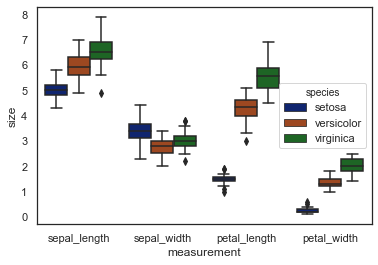

In [114]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);

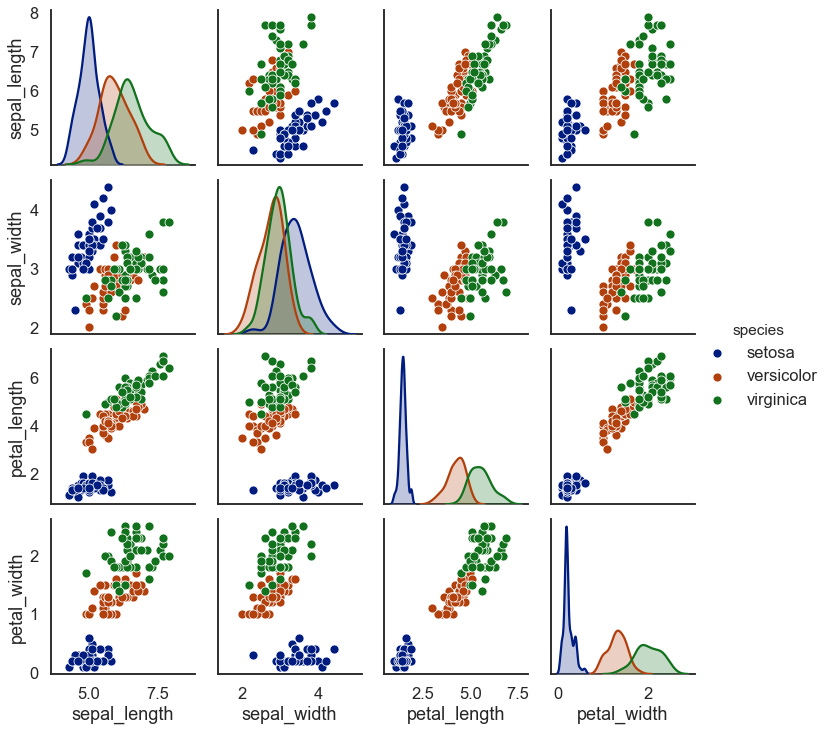

In [115]:
sns.set_context('talk')
sns.pairplot(data, hue='species');

### Feature Engineering 

In [116]:
## Load in the Ames Housing Data
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data.tsv'

df = pd.read_csv(path, sep='\t')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [117]:
# This is recommended by the data set author to remove a few outliers

df = df.loc[df['Gr Liv Area'] <= 4000,:]
print("Number of rows in the data:", df.shape[0])
print("Number of columns in the data:", df.shape[1])
data = df.copy() # Keep a copy our original data 
df.head()

Number of rows in the data: 2925
Number of columns in the data: 82


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [118]:
# drop columns that are not useful for ML and for which the value is unique for all observations
df.drop(['Order', 'PID'], axis=1, inplace=True)

In [119]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = df.dtypes[df.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

df[one_hot_encode_cols].head().T

,0,1,2,3,4
MS Zoning,RL,RH,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,Reg,IR1,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
Lot Config,Corner,Inside,Corner,Corner,Inside
Land Slope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,NAmes,NAmes,NAmes,NAmes,Gilbert
Condition 1,Norm,Feedr,Norm,Norm,Norm


In [120]:
# Do the one hot encoding
df = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MS SubClass,2925.0,57.396581,42.668752,20.0,20.0,50.0,70.0,190.0
Lot Frontage,2435.0,69.023819,22.710918,21.0,58.0,68.0,80.0,313.0
Lot Area,2925.0,10103.583590,7781.999124,1300.0,7438.0,9428.0,11515.0,215245.0
Overall Qual,2925.0,6.088205,1.402953,1.0,5.0,6.0,7.0,10.0
Overall Cond,2925.0,5.563761,1.112262,1.0,5.0,5.0,6.0,9.0
...,...,...,...,...,...,...,...,...
Sale Condition_AdjLand,2925.0,0.004103,0.063931,0.0,0.0,0.0,0.0,1.0
Sale Condition_Alloca,2925.0,0.008205,0.090225,0.0,0.0,0.0,0.0,1.0
Sale Condition_Family,2925.0,0.015726,0.124437,0.0,0.0,0.0,0.0,1.0
Sale Condition_Normal,2925.0,0.824615,0.380361,0.0,1.0,1.0,1.0,1.0


In [121]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [128]:
# Create a list of float colums to check for skewing
mask = df.dtypes == float
float_cols = df.select_dtypes('number').columns #df.columns[mask]
# print(float_cols)
skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df[float_cols].skew()
print(skew_vals)


Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2',
       ...
       'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD',
       'Sale Type_WD ', 'Sale Condition_AdjLand', 'Sale Condition_Alloca',
       'Sale Condition_Family', 'Sale Condition_Normal',
       'Sale Condition_Partial'],
      dtype='object', length=260)
MS SubClass                1.356549
Lot Frontage               1.111071
Lot Area                  13.200004
Overall Qual               0.171657
Overall Cond               0.572769
                            ...    
Sale Condition_AdjLand    15.524216
Sale Condition_Alloca     10.908956
Sale Condition_Family      7.788783
Sale Condition_Normal     -1.708049
Sale Condition_Partial     3.030907
Length: 260, dtype: float64


In [129]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
Kitchen Qual_Po,54.083269
Utilities_NoSeWa,54.083269
Roof Matl_Membran,54.083269
Exterior 1st_PreCast,54.083269
Exterior 2nd_PreCast,54.083269
...,...
Functional_Typ,-3.400918
Central Air_Y,-3.465199
Heating_GasA,-7.879041
Condition 2_Norm,-9.898109


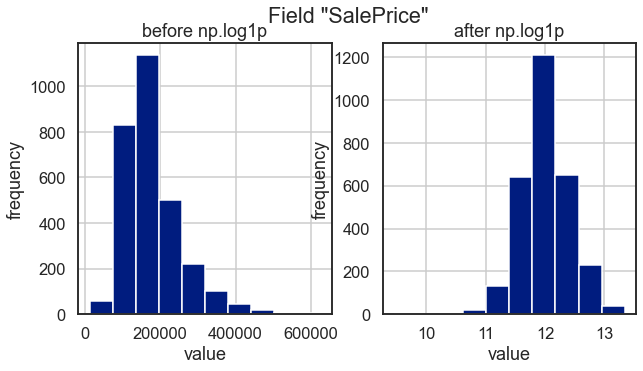

In [130]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "SalePrice"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [131]:
# Perform the skew transformation:

for col in skew_cols.index.values:
    if col == "SalePrice":
        continue
    df[col] = df[col].apply(np.log1p)

In [132]:
# We now have a larger set of potentially-useful features

df.shape

(2925, 260)

In [135]:
# There are a *lot* of variables. Let's go back to our saved original data and look at how many values are missing for each variable. 
from sympy import asec


df = data
data.isnull().sum().sort_values(ascending=False)

Pool QC           2914
Misc Feature      2820
Alley             2727
Fence             2354
Fireplace Qu      1422
                  ... 
1st Flr SF           0
Central Air          0
Heating QC           0
Sale Condition       0
Order                0
Length: 82, dtype: int64

In [136]:
smaller_df= df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars','SalePrice']]

# Now we can look at summary statistics of the subset data
smaller_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lot Area,2925.0,10103.583590,7781.999124,1300.0,7438.0,9428.0,11515.0,215245.0
Overall Qual,2925.0,6.088205,1.402953,1.0,5.0,6.0,7.0,10.0
Overall Cond,2925.0,5.563761,1.112262,1.0,5.0,5.0,6.0,9.0
Year Built,2925.0,1971.302906,30.242474,1872.0,1954.0,1973.0,2001.0,2010.0
Year Remod/Add,2925.0,1984.234188,20.861774,1950.0,1965.0,1993.0,2004.0,2010.0
Gr Liv Area,2925.0,1493.978803,486.273646,334.0,1126.0,1441.0,1740.0,3820.0
Full Bath,2925.0,1.564786,0.551386,0.0,1.0,2.0,2.0,4.0
Bedroom AbvGr,2925.0,2.853675,0.827737,0.0,2.0,3.0,3.0,8.0
Fireplaces,2925.0,0.596923,0.645349,0.0,0.0,1.0,1.0,4.0
Garage Cars,2924.0,1.765048,0.759834,0.0,1.0,2.0,2.0,5.0


In [137]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2924 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


In [138]:
# There appears to be one NA in Garage Cars - we will take a simple approach and fill it with 0
smaller_df = smaller_df.fillna(0)

smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2925 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


In [ ]:
sns.pairplot(smaller_df, plot_kws=dict(alpha=.1, edgecolor='none'))

In [ ]:
#Separate our features from our target

X = smaller_df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars']]

y = smaller_df['SalePrice']

X.info()

In [ ]:
data['House Style'].value_counts()

In [ ]:
pd.get_dummies(df).head()

In [ ]:
pd.get_dummies(df['House Style'], drop_first=True).head()

In [ ]:
nbh_counts = df.Neighborhood.value_counts()
nbh_counts

In [ ]:
other_nbhs = list(nbh_counts[nbh_counts <= 8].index)

other_nbhs

In [ ]:
X4 = X.copy()

X4['Neighborhood'] = df['Neighborhood'].replace(other_nbhs, 'Other')

X4.Neighborhood.value_counts()


## Hypothesis Testing 